# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [42]:
#Type your code here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [43]:
#Type your code here
df = pd.read_csv('../cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Data Understanding

Describe the shape of the data

In [44]:
df.shape

(70000, 13)

Describe the data type of columns

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Describe numerical columns

In [46]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Describe unique values

In [47]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

Checking for null and duplicate values

In [48]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [49]:
df.duplicated().sum()

0

### EDA - Univariate

Check the distribution of Categorical Variables

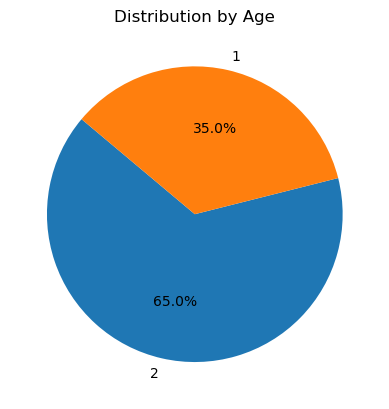

In [50]:
# Distribution by gender 
plt.pie(df['gender'].value_counts(), labels=df['gender'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Age')
plt.show()

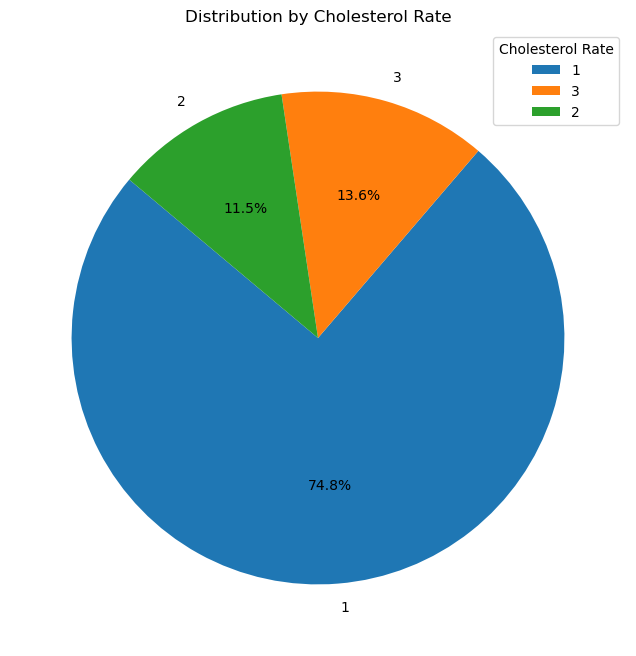

In [51]:
# Distribution by cholesterol rate 
plt.figure(figsize=(8,8))
plt.pie(df['cholesterol'].value_counts(), labels=df['cholesterol'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Cholesterol Rate')
plt.legend(title='Cholesterol Rate')
plt.show()

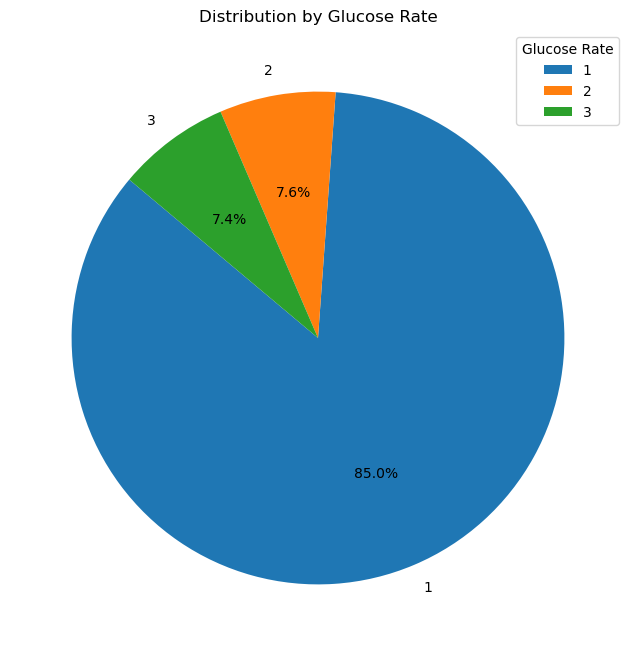

In [52]:
# Distribution by Glucose rate
plt.figure(figsize=(8,8))
plt.pie(df['gluc'].value_counts(), labels=df['gluc'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Glucose Rate')
plt.legend(title='Glucose Rate')
plt.show()

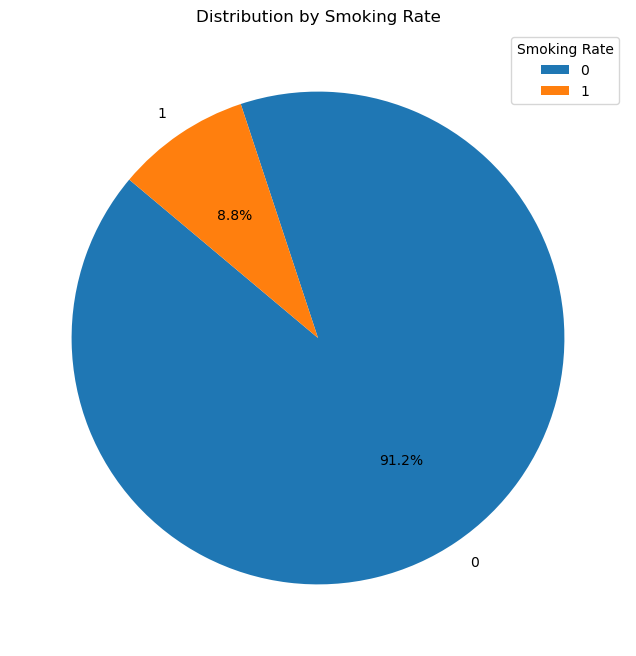

In [53]:
# Distribution by smoking rate 
plt.figure(figsize=(8,8))
plt.pie(df['smoke'].value_counts(), labels=df['smoke'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Smoking Rate')
plt.legend(title='Smoking Rate')
plt.show()

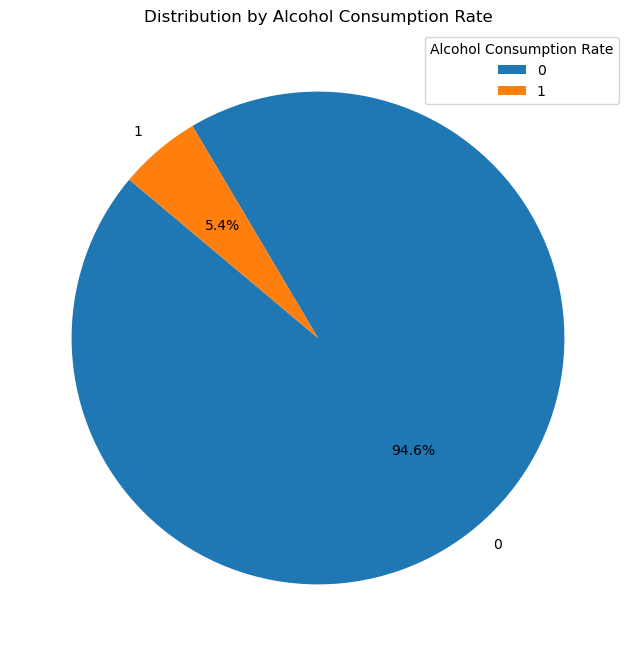

In [54]:
# Distribution by Alcohol consumption rate
plt.figure(figsize=(8,8))
plt.pie(df['alco'].value_counts(), labels=df['alco'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Alcohol Consumption Rate')
plt.legend(title='Alcohol Consumption Rate')
plt.show()

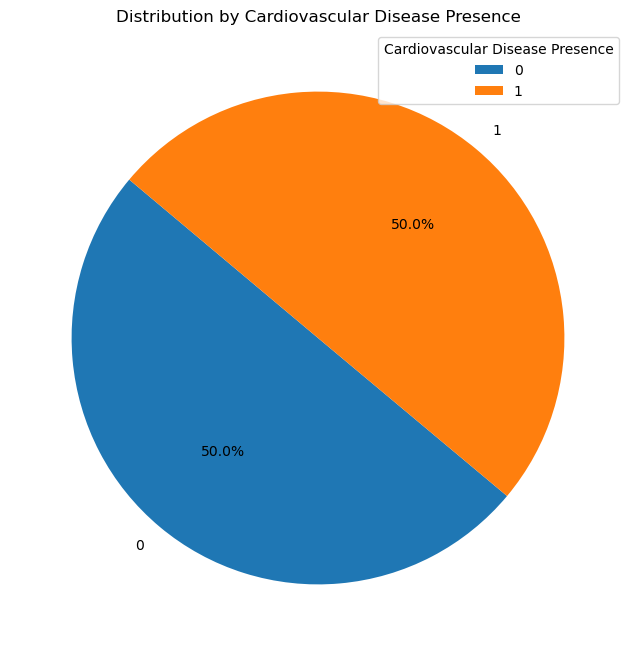

In [55]:
# Distribution by presence of Cardiovascular Disease
plt.figure(figsize=(8,8))
plt.pie(df['cardio'].value_counts(), labels=df['cardio'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Cardiovascular Disease Presence')
plt.legend(title='Cardiovascular Disease Presence')
plt.show()

Check the distribution of Numerical Variables

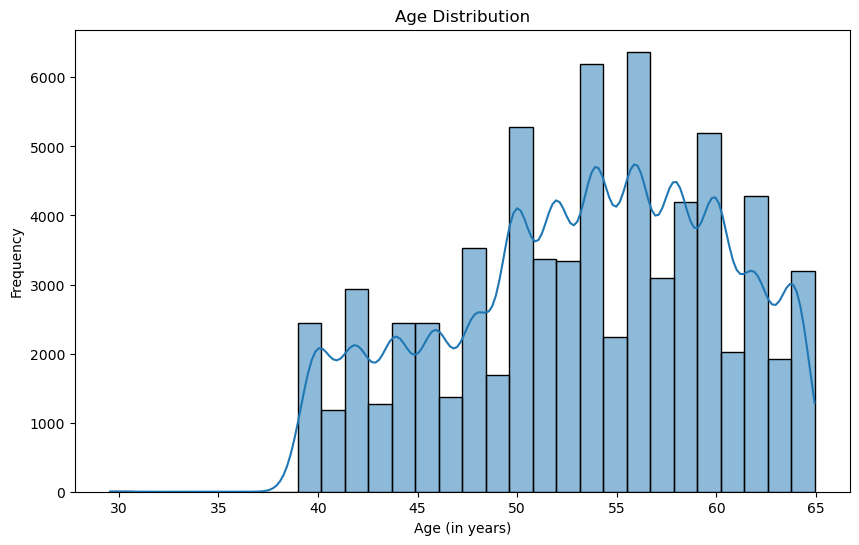

In [56]:
# Check the distribution of age
plt.figure(figsize=(10,6))
df['age'] = df['age'] / 365.25  # Convert days to years
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.show()

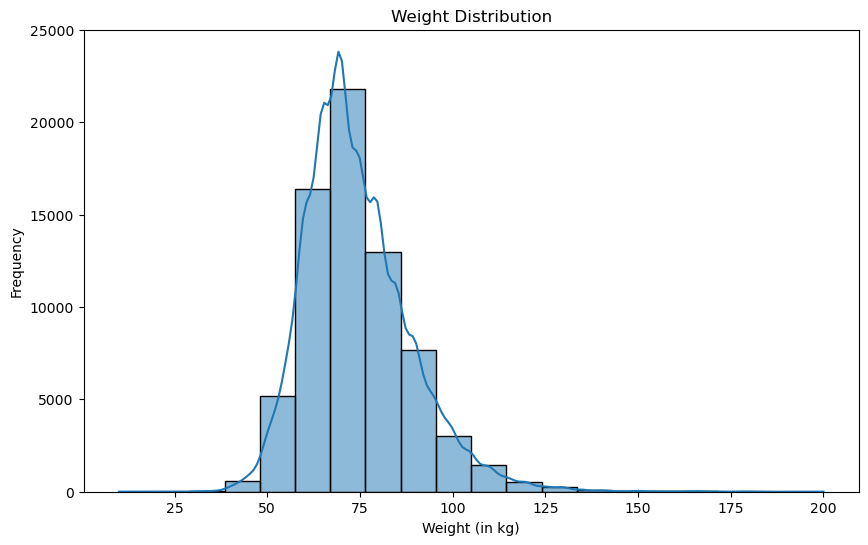

In [57]:
# Distribution of weight 
plt.figure(figsize=(10,6))
sns.histplot(df['weight'], bins=20, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (in kg)')
plt.ylabel('Frequency')
plt.show()

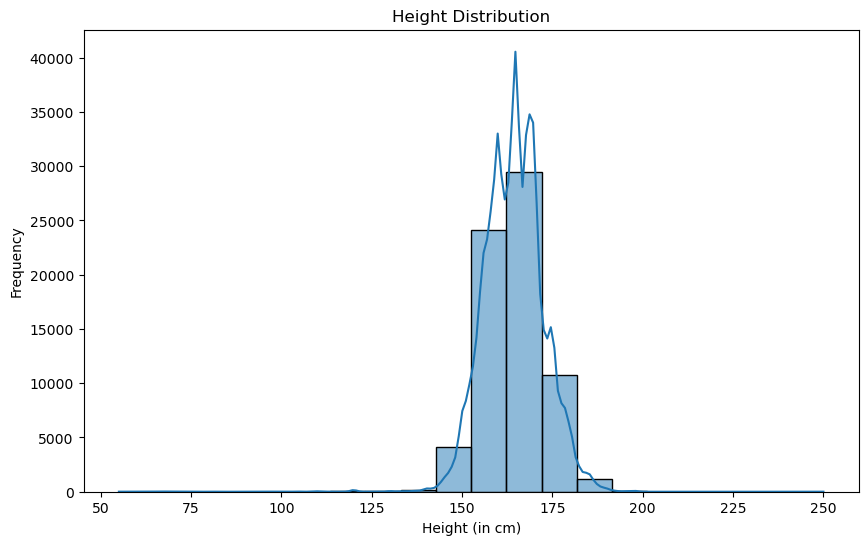

In [58]:
# Distribution by height 
plt.figure(figsize=(10,6))
sns.histplot(df['height'], bins=20, kde=True)
plt.title('Height Distribution')
plt.xlabel('Height (in cm)')
plt.ylabel('Frequency')
plt.show()

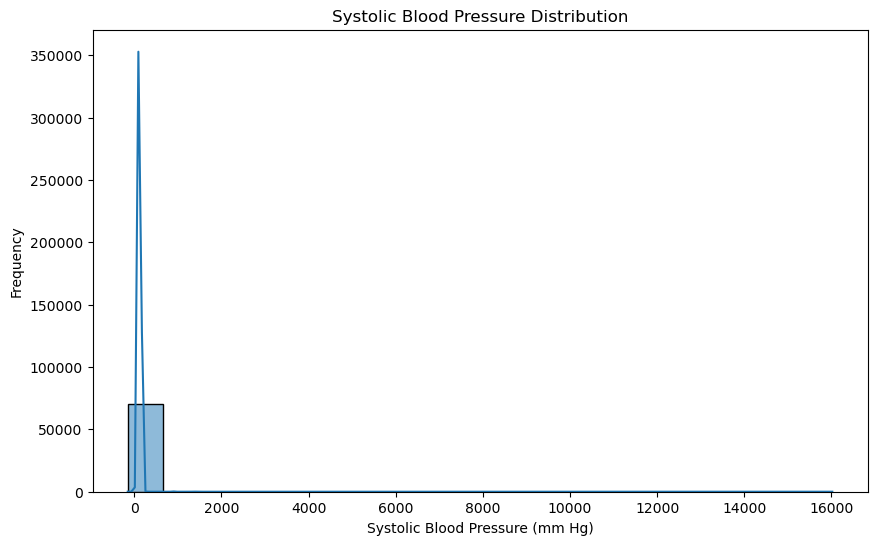

In [59]:
# Distribution by Systolic Blood Pressure
plt.figure(figsize=(10,6))
sns.histplot(df['ap_hi'], bins=20, kde=True)
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('Systolic Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

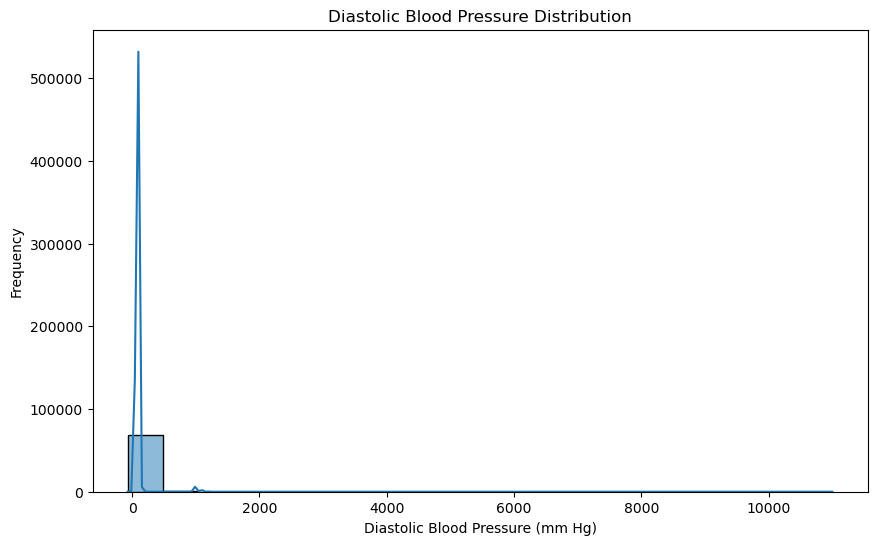

In [60]:
# Distribution of Diastolic Blood Pressure
plt.figure(figsize=(10,6))
sns.histplot(df['ap_lo'], bins=20, kde=True)
plt.title('Diastolic Blood Pressure Distribution')
plt.xlabel('Diastolic Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

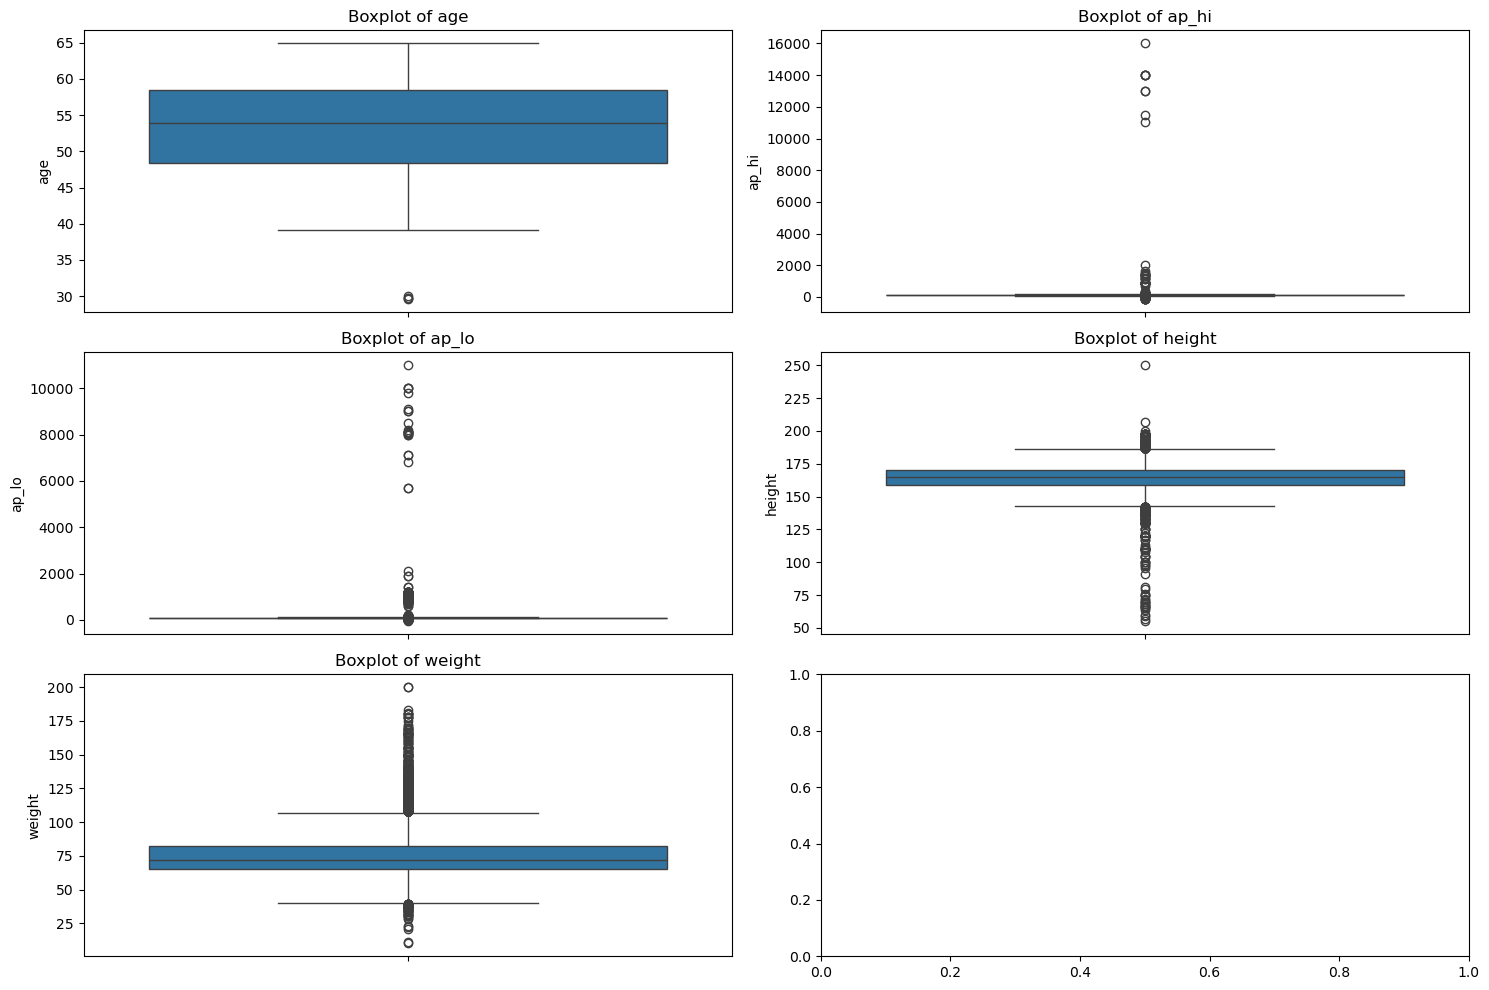

In [61]:
# Detecting outliers 
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, column in enumerate(['age', 'ap_hi', 'ap_lo', 'height', 'weight']):
    sns.boxplot(data=df, y=column, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### EDA - Bivariate

Checking connection between numerical variables and categorical variables

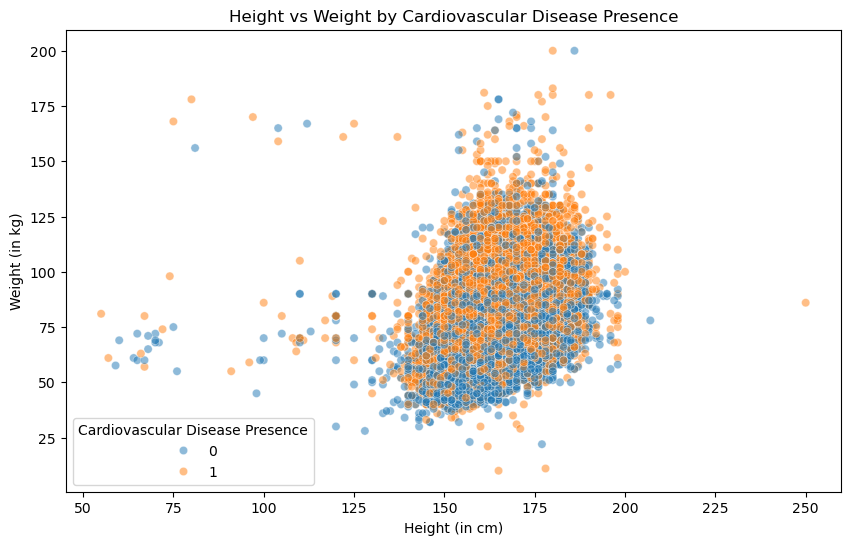

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='height', y='weight', hue='cardio', data=df, alpha=0.5)
plt.title('Height vs Weight by Cardiovascular Disease Presence')
plt.xlabel('Height (in cm)')
plt.ylabel('Weight (in kg)')
plt.legend(title='Cardiovascular Disease Presence')
plt.show()

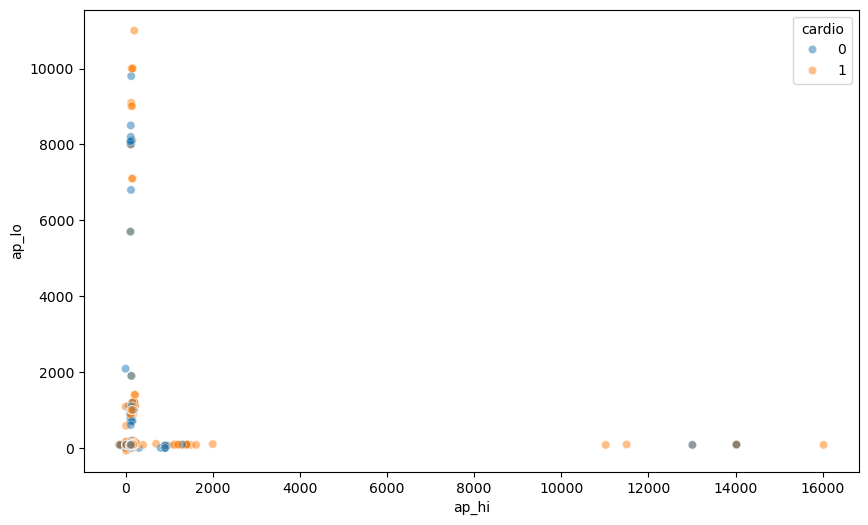

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=df, alpha=0.5)
plt.show()

### EDA - Multivariate

Checking correlation between variables

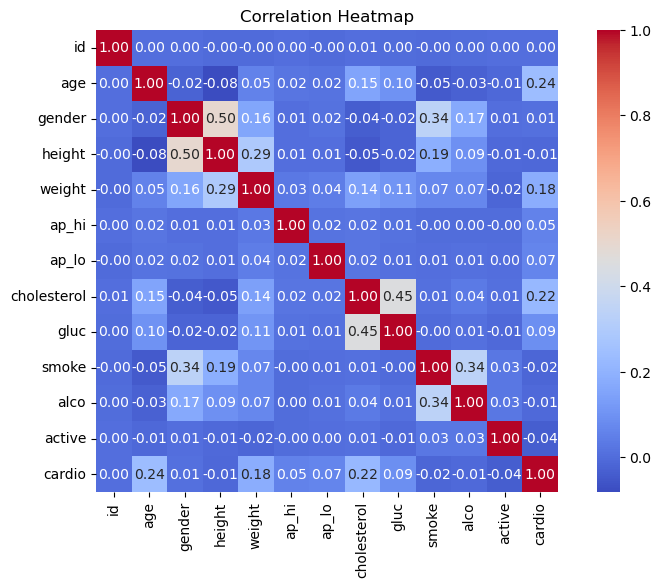

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [65]:
# Check for null values 
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [66]:
# Check for duplicates
df.duplicated().sum()

0

Using standard scaler to standarize data

In [67]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

Export preprocessed data into csv

In [70]:

main_df = pd.DataFrame(scaler.inverse_transform(scaled), columns=df.columns)

main_df.to_csv('cardio_train_scaled.csv', index=False)